# SHOPPING TRENDS EXPLORATORY DATA ANALYSIS

# The primary Objective of this analysis is to explore and identify key shopping trends based on various factors such as gender, age, location, seasonality and purchasing behaviour. This analysis aims to provide insights that can help improve business strategies, enhance customer engagement and optimize marketing efforts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("shopping_trends.xlsx")

In [3]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [10]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Anaysing the total purchase amount by gender

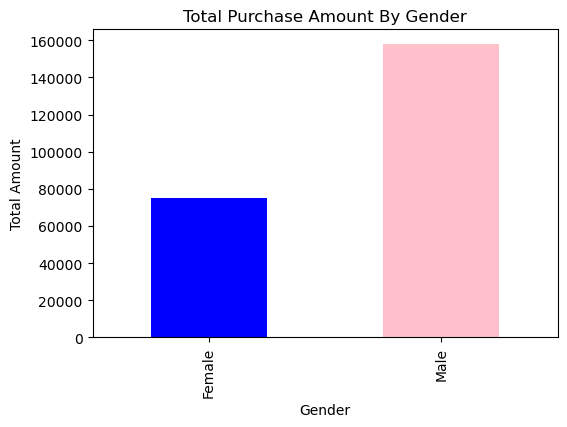

In [75]:
gender_purchase=df.groupby('Gender')["Purchase Amount (USD)"].sum()
plt.figure(figsize=(6,4))
gender_purchase.plot(kind="bar",color=['Blue','pink'])
plt.title("Total Purchase Amount By Gender")
plt.ylabel("Total Amount")
plt.show()


#  Observation: Males exhibit a higher total purchase amount compared to females. We can assume that Men tend to spend more per transaction or shop more frequently.

# Preffered categories among the gender

Text(0.5, 1.0, 'Prefferd Categories By Gender')

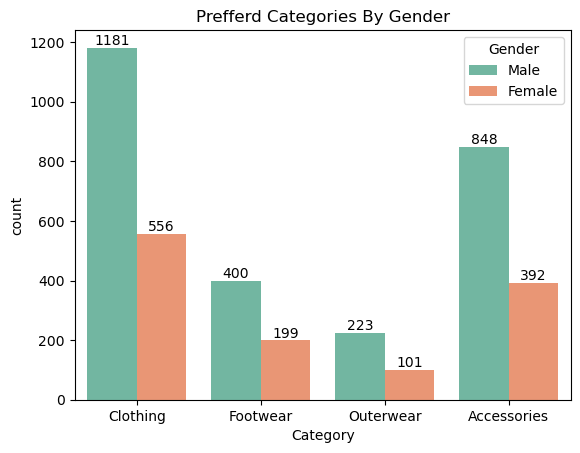

In [40]:
ax=sns.countplot(data=df,x="Category",hue="Gender",palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Prefferd Categories By Gender")



# Observation: Clothing is the most preferred category for both genders, followed by accessories and least preffred catgeory by both male and females are outwear

# Age vs Purchase Trend

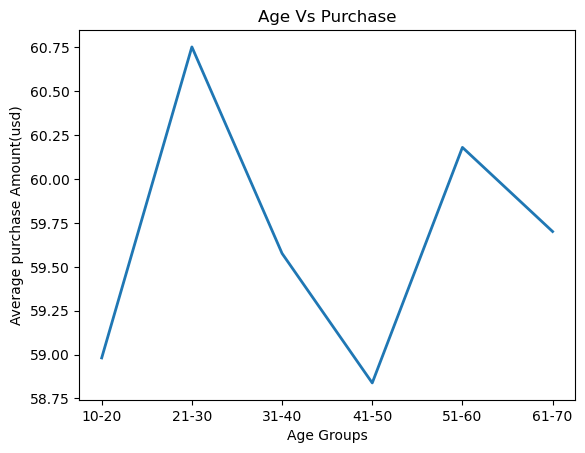

In [9]:
bins=[10,20,30,40,50,60,70,80]
label=["10-20","21-30","31-40","41-50","51-60","61-70","71-80"]
df["Age Groups"]=pd.cut(df["Age"],bins=bins,labels=label,right=True)
age_purchase=df.groupby(["Age Groups"],as_index=False,observed=False)["Purchase Amount (USD)"].mean()

sns.lineplot(data=age_purchase,x="Age Groups",y="Purchase Amount (USD)",linewidth=2)

plt.title("Age Vs Purchase")

plt.ylabel("Average purchase Amount(usd)")
plt.show()

# Observation: Customers aged 21-30 and 51-60 contribute the highest purchase volumes whereas customers from the aged from  31 -50 contribute very low to the purchases

# Total Discount Applied over the Seasons

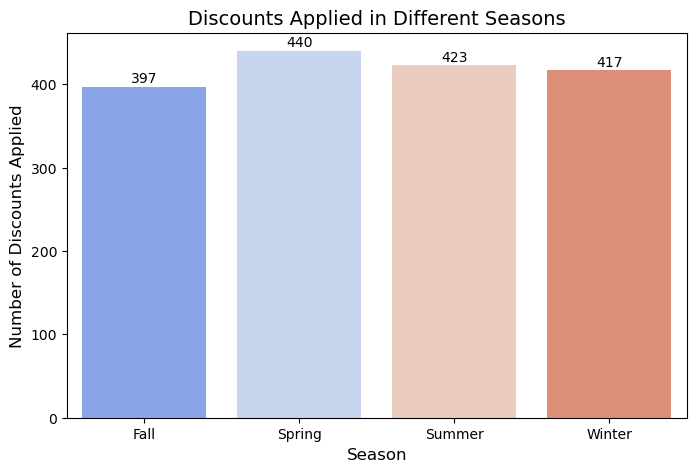

In [9]:
# Group data by season and count occurrences of discounts
season_discounts = df[df["Discount Applied"] == "Yes"].groupby("Season")["Discount Applied"].count().reset_index()

# Plot the data
plt.figure(figsize=(8,5))
sns.barplot(data=season_discounts, x="Season",y="Discount Applied",hue="Season", palette="coolwarm",legend=False)

# Add labels and title
plt.title("Discounts Applied in Different Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Discounts Applied", fontsize=12)

# Display values on bars
for index, value in enumerate(season_discounts["Discount Applied"]):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

plt.show()

#  Observations:  More discount are given in the spring season as compared to other seasons

# Most Preffred Season For Purchase By Gender (Seasonal Analysis)

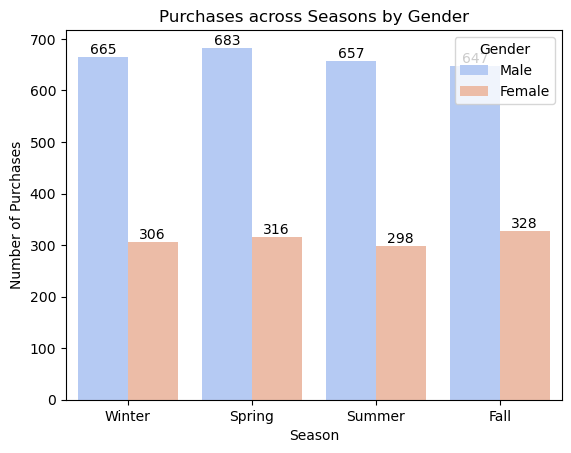

In [5]:
ax=sns.countplot(data=df,x="Season",hue="Gender",palette="coolwarm")
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Purchases across Seasons by Gender")
plt.ylabel("Number of Purchases")
plt.show()


 # Observation: Spring has the highest number of total purchases, with male purchases (683) among all the seasons whereas the female purchases relatively higher in Fall (328) and spring (316) compared to other seasons

# Purchase Frequency Analysis

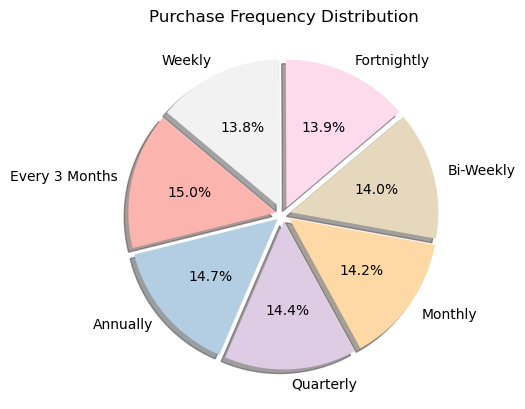

In [14]:

df["Frequency of Purchases"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="Pastel1", explode=[0.05]*len(df["Frequency of Purchases"].unique()), shadow=True)
plt.title("Purchase Frequency Distribution")
plt.ylabel("")
plt.show()


# From the above pie chart it can be observed that the most of puchases are done every 3 months and less purchases are weekly 

# Most Preffred Payment Methods By Customers

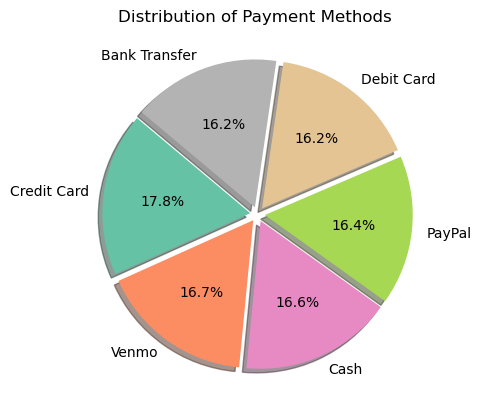

In [87]:

df["Payment Method"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140, colormap="Set2", explode=[0.05]*len(df["Payment Method"].unique()), shadow=True)
plt.title("Distribution of Payment Methods ")
plt.ylabel(" ")
plt.show()

# Observation: Purchases are distributed fairly evenly across different frequencies, with the most common purchase intervals being "Every 3 Months" (15%) and "Annually" (14.7%).

# Top 5 Locations withs Highest Purchases

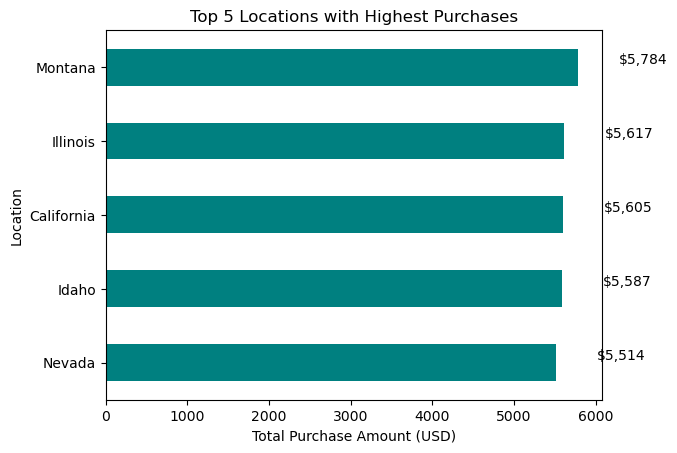

In [7]:

# Group by location and calculate total purchases
location_purchases = df.groupby("Location")["Purchase Amount (USD)"].sum().sort_values(ascending=False)

# Select top 5 locations
top_5_locations = location_purchases.head(5)

# Plot horizontal bar chart
ax = top_5_locations.plot(kind="barh", color="teal")

# Add values on bars
for index, value in enumerate(top_5_locations):
    plt.text(value + 500, index, f"${value:,.0f}", va='bottom', fontsize=10)

# Labels and title
plt.title("Top 5 Locations with Highest Purchases")
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Location")

plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# Observations: The highest purchases is done in Montana ($5,784) then followed by other regions but these regions contribute signficantly to overall sales

# Bottom 5 Location with Lowest Purchases

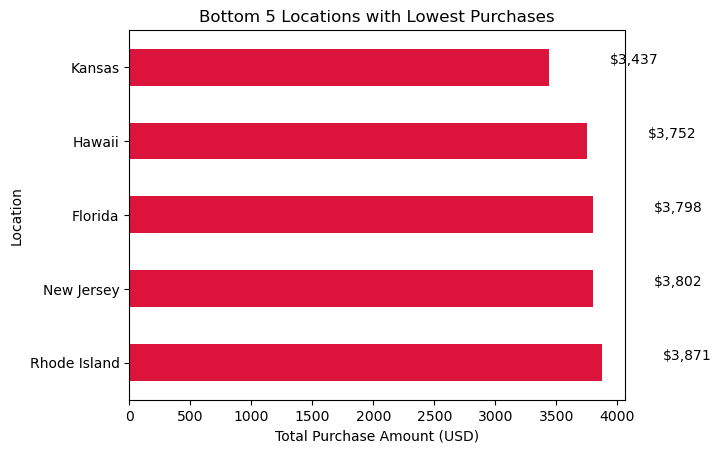

In [9]:

# Group by location and calculate total purchases
location_purchases = df.groupby("Location")["Purchase Amount (USD)"].sum().sort_values(ascending=False)

# Select top 5 locations
bottom_5_locations = location_purchases.tail(5)

# Plot horizontal bar chart
ax = bottom_5_locations.plot(kind="barh", color="crimson")

# Add values on bars
for index, value in enumerate(bottom_5_locations):
    plt.text(value + 500, index, f"${value:,.0f}", va='bottom', fontsize=10)

# Labels and title
plt.title("Bottom 5 Locations with Lowest Purchases")
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Location")


plt.show()

# Observations :The lowest purchases done from the Kansas which is $ 3,437 followed by the other locations  these regions show lower purchase activity contributing significantly less to overall sales

# The Top 10 most Purchased Items along with its Categories

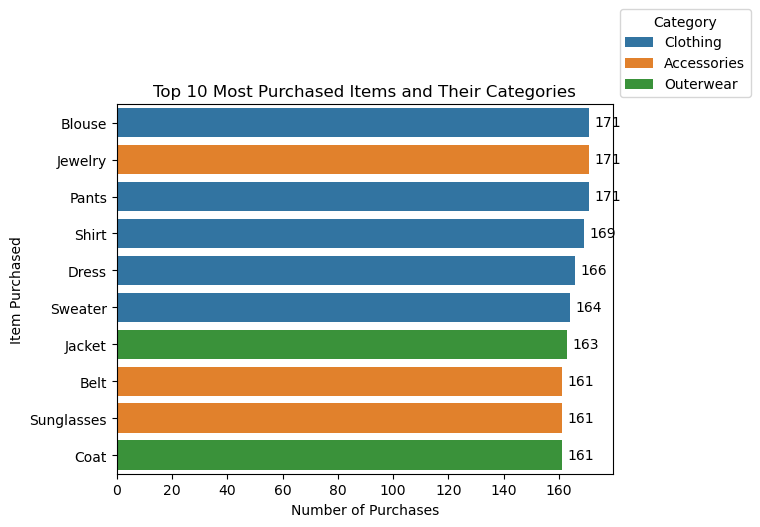

In [7]:
# Count the top 10 most purchased items
top_items = df["Item Purchased"].value_counts().head(10).reset_index()
top_items.columns = ["Item Purchased", "Purchase Count"]

# Merge with the original dataset to get the corresponding categories
top_items_with_category = top_items.merge(df[["Item Purchased", "Category"]].drop_duplicates(), on="Item Purchased", how="left")
sns.barplot(data=top_items_with_category, x="Purchase Count", y="Item Purchased", hue="Category", palette="tab10")

# Add labels
plt.title("Top 10 Most Purchased Items and Their Categories")
plt.xlabel("Number of Purchases")
plt.ylabel("Item Purchased")
plt.legend(title="Category", bbox_to_anchor=(1, 1))  # Move legend outside

# Show values on bars
for index, value in enumerate(top_items["Purchase Count"]):
    plt.text(value + 2, index, str(value), va="center", fontsize=10)

plt.show()



# Clothing items dominate the purchases (Blouse, Pants, Shirt, Dress) Accessories (Jewelry, Belt, Sunglasses) and Outerwear (Jacket, Coat) are also popular. It suggests that no single item is overwhelmingly dominant, suggesting a balanced demand for various products.

# Number of Subcribed and Unsubcribed User

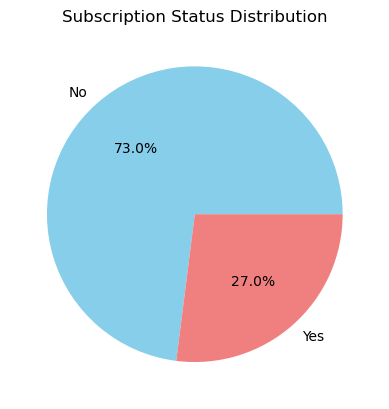

In [10]:
# Count values
subscription_counts = df["Subscription Status"].value_counts()

# Pie chart
plt.pie(subscription_counts, labels=subscription_counts.index, autopct="%1.1f%%", colors=["skyblue", "lightcoral"])

plt.title("Subscription Status Distribution")
plt.show()


# The number of unsubcribed users is more that is 73% as compared to subcribed users,subcribed users are comparitvely less i.e 27% only

# Realtionship between Subscription Status vs. Purchase Amount 

C:\Users\Aakash unecha\AppData\Local\Temp\ipykernel_2688\4010104147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subscription_data, x="Subscription Status", y="Purchase Amount (USD)", palette="coolwarm")


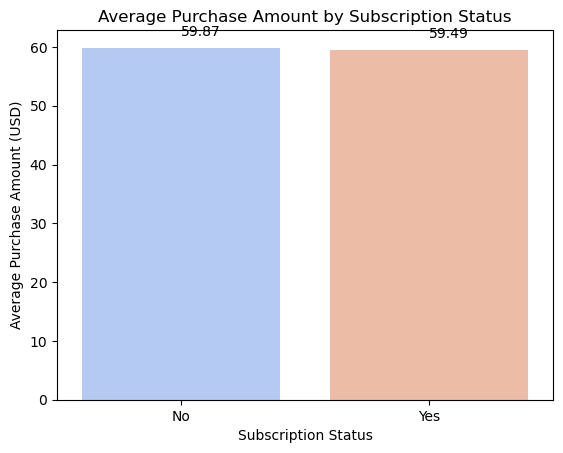

In [51]:

subscription_data = df.groupby("Subscription Status")["Purchase Amount (USD)"].mean().reset_index()

# Bar chart
sns.barplot(data=subscription_data, x="Subscription Status", y="Purchase Amount (USD)", palette="coolwarm")

# Labels and title
plt.title("Average Purchase Amount by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Average Purchase Amount (USD)")

# Show values on bars
for index, value in enumerate(subscription_data["Purchase Amount (USD)"]):
    plt.text(index, value + 2, str(round(value, 2)), fontsize=10)

plt.show()

# The difference in average purchase amounts between subscribers and non-subscribers is minimal .This suggests that subscribing does not significantly change how much customers spend per transaction.

# Previous Purchase Vs Current Purchase

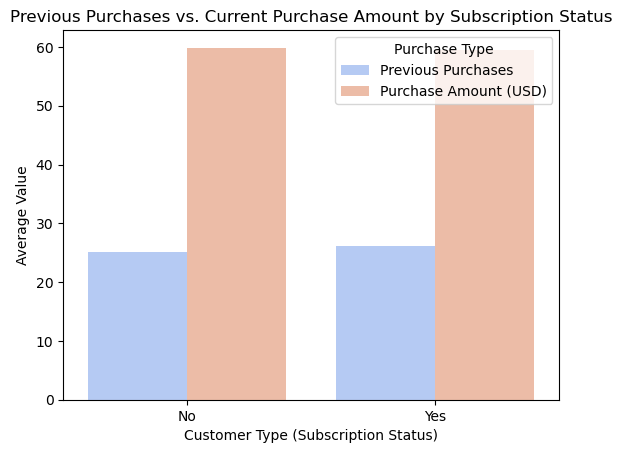

In [6]:


# Grouping data by Subscription Status
customer_data = df.groupby("Subscription Status")[["Previous Purchases", "Purchase Amount (USD)"]].mean().reset_index()

# Plot both previous and current purchase trends
customer_data_melted = customer_data.melt(id_vars="Subscription Status", var_name="Purchase Type", value_name="Value")

sns.barplot(data=customer_data_melted, x="Subscription Status", y="Value", hue="Purchase Type", palette="coolwarm")

# Labels and title
plt.title("Previous Purchases vs. Current Purchase Amount by Subscription Status")
plt.xlabel("Customer Type (Subscription Status)")
plt.ylabel("Average Value")
plt.legend(title="Purchase Type")

plt.show()








# Both subscriber and non-subscriber groups have similar previous purchase behavior.Subscribers tend to spend slightly more in their current purchase, but the difference is not dramatic.This indicates that subscription status may not be a strong driver of spending behavior.


# Recommendations 

# 1) Develop targeted campaigns for the 21-30 and 51-60 age groups.

# 2) Offer personalized recommendations based on past purchase behaviour.

# 3) Strengthen brand presence in underperforming regions through localized promotions.

#  4) Analyse factors affecting low sales in specific locations and address customer pain points.

# 5) Enhance subscriber benefits and expand the subscription model. 

# Conclusion: 
#  The shopping trends analysis highlights key behavioural patterns among customers, emphasizing the importance of targeted marketing, seasonal strategies, and customer loyalty initiatives. By implementing these recommendations, businesses can enhance customer engagement, optimize subscription plans , and drive revenue growth.

